In [1]:
import scipy.stats as st
import numpy as np

In [2]:
cars_table=[[256,74],
            [41,42],
            [66,34]]

In [3]:
st.chi2_contingency(np.array(cars_table))

Chi2ContingencyResult(statistic=26.8113499370887, pvalue=1.5065700686908928e-06, dof=2, expected_freq=array([[233.50877193,  96.49122807],
       [ 58.73099415,  24.26900585],
       [ 70.76023392,  29.23976608]]))

In [ ]:
#seems like our car manufacturers are actually quite differentiated.
#good for them!

In [4]:
import pandas as pd

In [5]:
data = pd.read_csv('HC4A_unit4_404.csv')
data.head()

,STATE,PVASTATE,DOB,MDMAUD,RECP3,GENDER,DOMAIN,INCOME,HOMEOWNR,HV1,...,VETERANS,NUMPROM,CARDPROM,CARDPM12,NUMPRM12,MAXADATE,RFA_2,NGIFTALL,TIMELAG,AVGGIFT
0,IL,NaN,3712,XXXX,NaN,F,T2,NaN,NaN,479,...,NaN,74,27,6,14,9702,L4E,31,4.0,7.741935
1,CA,NaN,5202,XXXX,NaN,M,S1,6.0,H,5468,...,NaN,32,12,6,13,9702,L2G,3,18.0,15.666667
2,NC,NaN,0,XXXX,NaN,M,R2,3.0,U,497,...,NaN,63,26,6,14,9702,L4E,27,12.0,7.481481
3,CA,NaN,2801,XXXX,NaN,F,R2,1.0,U,1000,...,NaN,66,27,6,14,9702,L4E,16,9.0,6.812500
4,FL,NaN,2001,XXXX,X,F,S2,3.0,H,576,...,NaN,113,43,10,25,9702,L2F,37,14.0,6.864865


In [6]:
data['MDMAUD'].value_counts(dropna=False)

XXXX    85544
C1CM       56
L1CM       41
I1CM       29
D2CM       22
C2CM       21
D1CM       17
L2CM       13
C1LM        8
L1LM        7
I2CM        7
D5CM        5
D5MM        5
D2MM        4
I1LM        3
D5TM        3
C2MM        3
C5CM        2
C2LM        2
C1MM        1
I2MM        1
I5CM        1
I5MM        1
C5MM        1
L1MM        1
C5TM        1
L2TM        1
Name: MDMAUD, dtype: int64

In [7]:
matrix_donors = data[data['MDMAUD']!='XXXX']
matrix_donors.shape

(256, 28)

In [8]:
matrix_donors['DOMAIN'].value_counts(dropna=False)

NaN    48
S1     42
C1     27
R2     26
U1     19
S2     16
T2     15
C2     13
T1     12
U2      9
C3      8
R3      6
U3      5
S3      4
R1      4
T3      2
Name: DOMAIN, dtype: int64

In [9]:
data_crosstab = pd.crosstab(matrix_donors['DOMAIN'], matrix_donors['MDMAUD'], margins=False)  #margins=True bashe ye all ham ezafe mishe
data_crosstab

MDMAUD,C1CM,C1LM,C1MM,C2CM,C2LM,C2MM,C5CM,C5MM,D1CM,D2CM,...,D5TM,I1CM,I1LM,I2CM,I5CM,L1CM,L1LM,L1MM,L2CM,L2TM
DOMAIN,,,,,,,,,,,,,,,,,,,,,
C1,5,0,0,2,0,1,0,0,2,2,...,1,3,1,0,0,7,1,0,0,0
C2,1,0,0,1,0,0,0,0,0,2,...,0,1,0,0,0,3,1,0,1,0
C3,1,0,0,0,0,0,0,0,0,0,...,0,3,0,1,1,1,0,0,0,0
R1,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
R2,10,0,0,1,0,0,1,0,3,3,...,0,3,0,0,0,1,1,0,1,1
R3,1,1,0,1,0,0,0,0,0,1,...,0,0,0,0,0,1,1,0,0,0
S1,13,4,1,2,1,0,1,1,0,6,...,0,3,2,0,0,5,1,0,2,0
S2,2,1,0,2,0,0,0,0,1,2,...,0,1,0,0,0,5,0,0,2,0
S3,0,1,0,0,1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [10]:
st.chi2_contingency(data_crosstab)[1]    #ma second elemnet ro mikhayem bekhater in bayad [1] ro moshakhas mikonim
# H0: MDMAUD and DOMAIN are not related
# p > 0.05 ===> we can not reject the H0 ===> we can work under the assumption that they are not related

0.44454437919070994

In [ ]:
# There is not enough evidence that people from different urban sprawls lapse faster/slower 

In [11]:
narrowdown_states = data[(data['STATE']== 'CA')|(data['STATE'] == 'IL')]

In [12]:
data_crosstab = pd.crosstab(narrowdown_states['DOMAIN'], narrowdown_states['STATE'], margins = False)  # Group by
data_crosstab

STATE,CA,IL
DOMAIN,,
C1,1091,403
C2,1090,435
C3,448,251
R1,203,56
R2,639,646
R3,154,195
S1,3108,961
S2,1382,632
S3,224,121


In [13]:
st.chi2_contingency(data_crosstab)[1]   #extremly zero 

1.546290000695185e-196

In [ ]:
# There is plenty of evidence that states and urban sprawl levels are NOT independent

In [ ]:
#ACTIVITY: Do INCOME vs GENDER

In [14]:
matrix_gender = data[(data['GENDER']== 'M')|(data['GENDER'] == 'F')]  # income and gender are independet
data_crosstab = pd.crosstab(matrix_gender['INCOME'], matrix_gender['GENDER'], margins = False)   
data_crosstab
#data_crosstab = pd.crosstab(data['GENDER'],data['GENDER'], margins = False) 

GENDER,F,M
INCOME,,
1.0,5247,3167
2.0,6966,5151
3.0,4442,3470
4.0,6351,5412
5.0,7796,6488
6.0,3795,3349
7.0,3600,3274


In [15]:
st.chi2_contingency(data_crosstab)[1] 

9.5955157643964e-49

In [ ]:
# Indeed there seems to be evidence that INCOME is NOT independent from GENDER

# Multicollinearity revisited

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
savings = pd.read_csv('savings.csv')
savings

,checking_acc,savings_acc,investment_acc,Total Savings
0,39578.90,45997.10,21394.00,106970
1,30744.25,36694.75,31736.00,99175
2,30816.85,53132.50,22315.65,106265
3,30720.86,39195.58,36017.56,105934
4,28838.40,28838.40,32443.20,90120
...,...,...,...,...
995,37417.45,44900.94,24588.61,106907
996,36688.62,33792.15,26068.23,96549
997,40350.96,24831.36,38281.68,103464
998,42845.40,43944.00,23070.60,109860


In [18]:
savings.corr()    # see total saving jame 3 taye ghabliye,harja total dedi tavajoh kon

,checking_acc,savings_acc,investment_acc,Total Savings
checking_acc,1.000000,-0.586695,0.093721,0.283531
savings_acc,-0.586695,1.000000,-0.593728,0.235279
investment_acc,0.093721,-0.593728,1.000000,0.304562
Total Savings,0.283531,0.235279,0.304562,1.000000


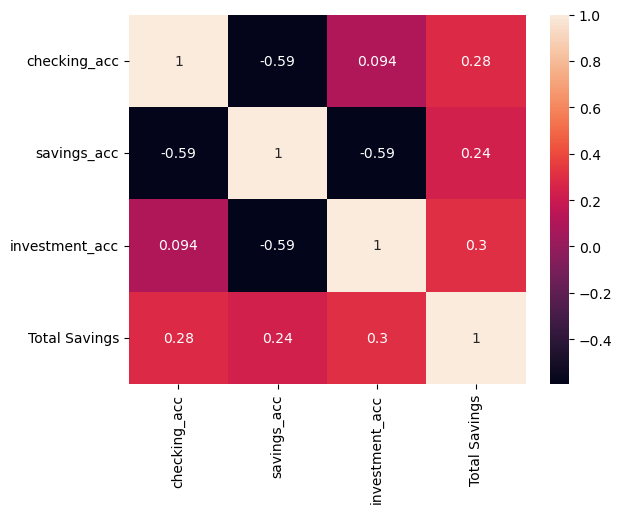

In [19]:
sns.heatmap(savings.corr(), annot=True)
plt.show()

In [ ]:
#we suspect "Total savings" is actually correlated with the others...   inja mikhad neshon bedeh ina correlation daran

In [20]:
savings['Control'] = savings['checking_acc'] +savings['savings_acc'] +savings['investment_acc'] 
savings.head()
#indeed we know that

,checking_acc,savings_acc,investment_acc,Total Savings,Control
0,39578.90,45997.10,21394.00,106970,106970.0
1,30744.25,36694.75,31736.00,99175,99175.0
2,30816.85,53132.50,22315.65,106265,106265.0
3,30720.86,39195.58,36017.56,105934,105934.0
4,28838.40,28838.40,32443.20,90120,90120.0


In [ ]:
#in general, we can't expect this to be so easy

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [22]:
y = savings['Total Savings']
X = savings[['checking_acc','savings_acc', 'investment_acc']]
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [23]:
LR = LinearRegression().fit(X_train,y_train)

In [24]:
y_pred = LR.predict(X_test)

In [25]:
r2_score(y_pred,y_test)  # we have a perfecr model but in reality it is imposiable

1.0

In [26]:
y_pred[:5]

array([ 99657.,  95091.,  96002., 107295.,  98457.])

In [27]:
y_test[:5]

C:\Users\Parinaz\AppData\Local\Temp\ipykernel_27404\1754177261.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  y_test[:5]


689     99657
718     95091
640     96002
205    107295
879     98457
Name: Total Savings, dtype: int64

In [ ]:
#the value is completely redundant, we should take it out!

In [28]:
LR.coef_

array([1., 1., 1.])

In [29]:
LR.intercept_

1.4551915228366852e-11